<a href="https://colab.research.google.com/github/SunAndClouds/SciComp-projects/blob/main/ProjectA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
!pip install gillespy2
import gillespy2
from gillespy2 import Model, Species, Reaction, Parameter, RateRule, AssignmentRule, FunctionDefinition
from gillespy2 import EventAssignment, EventTrigger, Event
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [14, 7]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 395 kB 7.5 MB/s 


Matrix elements: $D_a, D_a', D_r, D_r', M_r, M_a, A, R, C, \emptyset$

parameters: 
$\alpha_a, \alpha_a', \alpha_r, \alpha_r',
\beta_a, \beta_r, \gamma_a, \gamma_r, \gamma_c,
\delta_a, \delta_r, \delta_{mr}, \delta_{ma},
\theta_a, \theta_r$

In [18]:
class Lotkavolterra_Oscillator(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Circadian rythm")
        self.volume = 1

        # model parameters: 15 in total
        self.add_parameter(Parameter(name="alpha_a", expression=50))    
        self.add_parameter(Parameter(name="alpha_ap", expression=500))   
        self.add_parameter(Parameter(name="alpha_r", expression=0.01))   
        self.add_parameter(Parameter(name="alpha_rp", expression=50))    
        self.add_parameter(Parameter(name="beta_a", expression=50)) 
        self.add_parameter(Parameter(name="beta_r", expression=5)) 
        self.add_parameter(Parameter(name="gamma_a", expression=1))    
        self.add_parameter(Parameter(name="gamma_r", expression=1))   
        self.add_parameter(Parameter(name="gamma_c", expression=2)) 
        self.add_parameter(Parameter(name="delta_a", expression=1))    
        self.add_parameter(Parameter(name="delta_r", expression=0.05)) # 0.2 for 2a and 2b, 0.05 for figure 5
        self.add_parameter(Parameter(name="delta_mr", expression=0.5)) 
        self.add_parameter(Parameter(name="delta_ma", expression=10)) 
        self.add_parameter(Parameter(name="theta_a", expression=50))   
        self.add_parameter(Parameter(name="theta_r", expression=100)) 


        # See matrix elements: 9 in total
        mode = "discrete"
        self.add_species(Species(name="D_a", initial_value=1, mode=mode))   
        self.add_species(Species(name="D_ap", initial_value=0, mode=mode)) 
        self.add_species(Species(name="D_r", initial_value=1, mode=mode))     
        self.add_species(Species(name="D_rp", initial_value=0, mode=mode))     
        self.add_species(Species(name="M_r", initial_value=0, mode=mode))     
        self.add_species(Species(name="M_a", initial_value=0, mode=mode))     
        self.add_species(Species(name="A", initial_value=0, mode=mode))     
        self.add_species(Species(name="R", initial_value=0, mode=mode))     
        self.add_species(Species(name="C", initial_value=0, mode=mode))     


        # Reactions: 18 in total
        self.add_reaction(Reaction(name="r1", reactants={'A': 1, 'R': 1}, products={'C': 1}, rate=self.listOfParameters["gamma_c"]))
        self.add_reaction(Reaction(name="r2", reactants={'A': 1}, products={}, rate=self.listOfParameters["delta_a"]))
        self.add_reaction(Reaction(name="r3", reactants={'C': 1}, products={'R': 1}, rate=self.listOfParameters["delta_a"]))
        self.add_reaction(Reaction(name="r4", reactants={'R': 1}, products={}, rate=self.listOfParameters["delta_r"]))
        self.add_reaction(Reaction(name="r5",  reactants={'D_a': 1, 'A': 1}, products={'D_ap': 1}, rate=self.listOfParameters["gamma_a"]))
        self.add_reaction(Reaction(name="r6",  reactants={'D_r': 1, 'A': 1}, products={'D_rp': 1}, rate=self.listOfParameters["gamma_r"]))

        self.add_reaction(Reaction(name="r7",  reactants={'D_ap': 1}, products={'D_a': 1, "D_a": 1}, rate=self.listOfParameters["theta_a"]))
        self.add_reaction(Reaction(name="r8",  reactants={'D_a': 1}, products={'D_a': 1, "M_a": 1}, rate=self.listOfParameters["alpha_a"]))
        self.add_reaction(Reaction(name="r9",  reactants={'D_ap': 1}, products={'D_ap': 1, "M_a": 1}, rate=self.listOfParameters["alpha_ap"]))
        self.add_reaction(Reaction(name="r10",  reactants={'M_a': 1}, products={}, rate=self.listOfParameters["delta_ma"]))
        self.add_reaction(Reaction(name="r11",  reactants={'M_a': 1}, products={'A':1, 'M_a':1}, rate=self.listOfParameters["beta_a"]))

        self.add_reaction(Reaction(name="r12",  reactants={'D_rp': 1}, products={'A':1, 'D_r': 1}, rate=self.listOfParameters["theta_r"]))
        self.add_reaction(Reaction(name="r13",  reactants={'D_r': 1}, products={'D_r':1, 'M_r': 1}, rate=self.listOfParameters["alpha_r"]))
        self.add_reaction(Reaction(name="r14",  reactants={'D_rp': 1}, products={'D_rp':1, 'M_r': 1}, rate=self.listOfParameters["alpha_rp"]))
        self.add_reaction(Reaction(name="r15", reactants={'M_r': 1}, products={}, rate=self.listOfParameters["delta_mr"]))
        self.add_reaction(Reaction(name="r116", reactants={'M_r': 1}, products={'M_r':1, 'R':1}, rate=self.listOfParameters["beta_r"]))

        # Timespan
        self.timespan(np.linspace(0, 400, 401))

model = Lotkavolterra_Oscillator()

In [26]:
n_trajectories = 1
#'SSA', 'ODE', 'CLE', 'Tau-Leaping', or 'Tau-Hybrid'
result = model.run(algorithm="SSA", number_of_trajectories=n_trajectories)

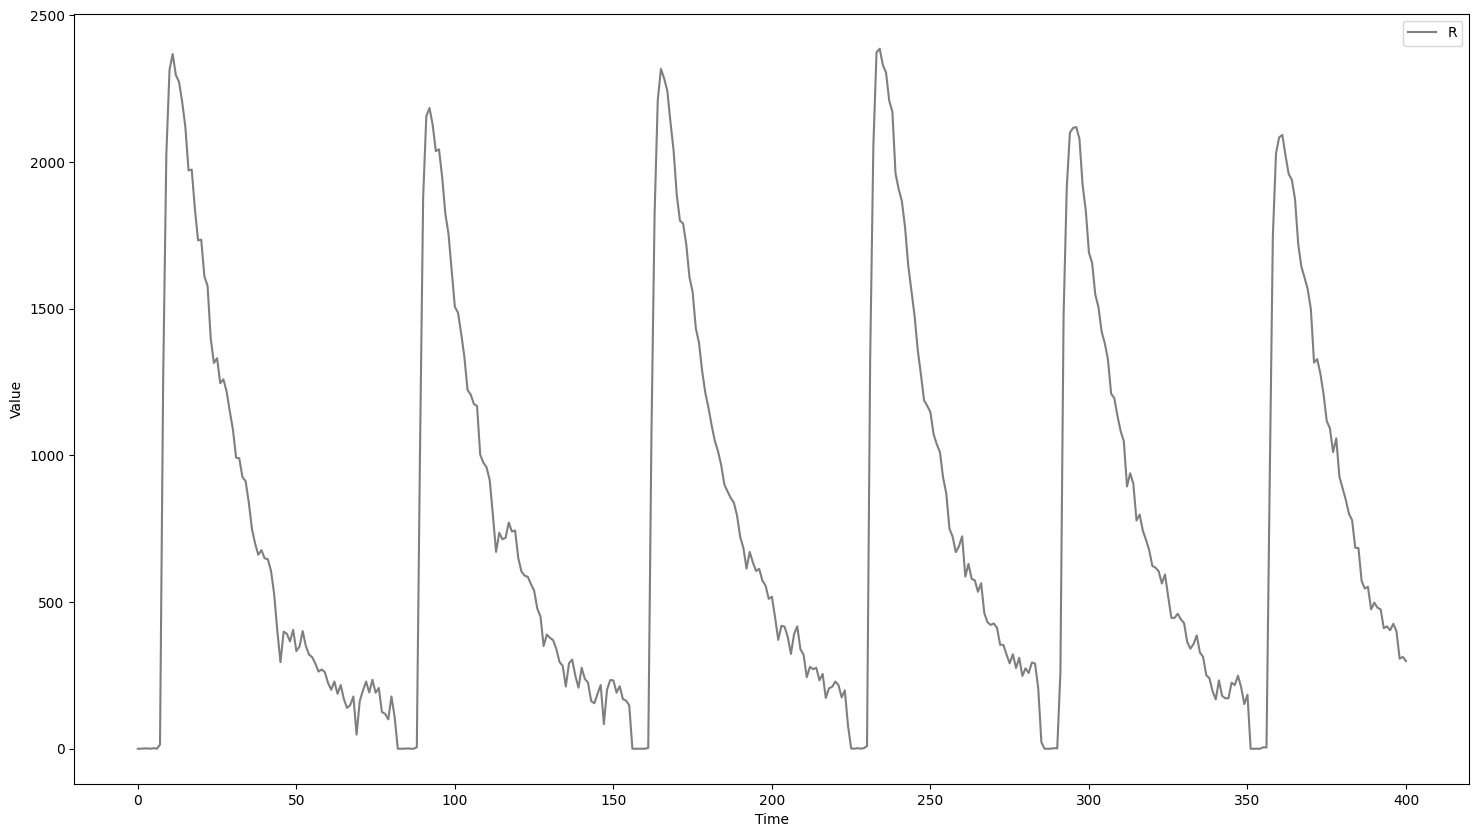

In [27]:
result.plot(included_species_list=["R"])

# Custom SSA 
This is just for understanding the code above

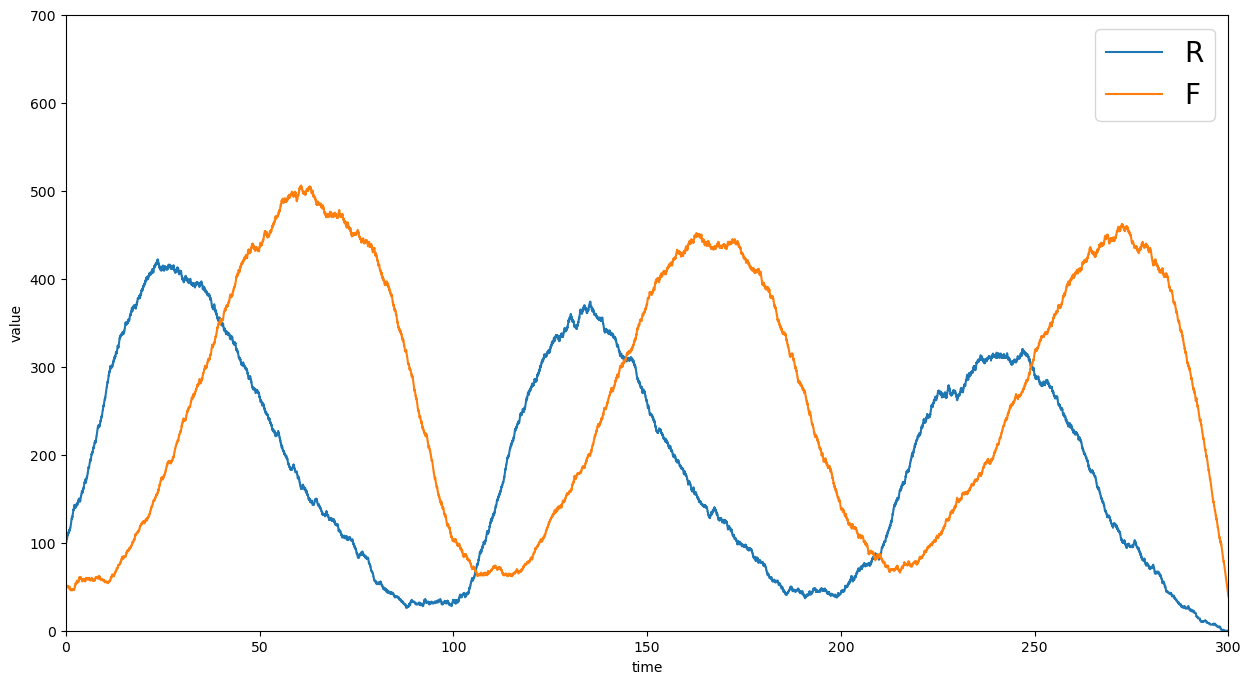

In [ ]:
# np.random.seed(1)
# Stoichiometry matrix, R: first column, F: second column
N = np.array([[1, 0],  # R increase, F nothing 
              [-1,1],  # F increase, R decrease
              [0,-1]]) # F decrease, R nothing

a, b, c = 1, 0.005, 0.6
Y0 = np.array([[100.0, 50.0]]) # initial condition
Y = Y0.copy()
result = []
time = np.linspace(0, 300, 10001)

for t in time:
    result.append(Y.tolist())
    
    # prospensity vector
    P = np.array([[a * Y[0,0]],
                  [b * Y[0,0] * Y[0,1]],
                  [c * Y[0,1]]])
    # computing the probability vector by 
    # normalizing the prospendity vector
    p = P / (P.sum() + 1e-8) 
    
    # finding the desired state by using 
    # inverse transform sampling
    u = np.random.rand(1)
    for state, p_i in enumerate(np.cumsum(p)):
        if u < p_i:
            break
    # computing the index
    Y += N[state] 
    
plt.figure(figsize=[15, 8])
R, F = np.array(result).reshape(-1, 2).T
plt.plot(time, R, label="R"), plt.plot(time, F, label="F")
plt.xlim(0, time[-1]), plt.ylim(0, 700)
plt.xlabel("time"), plt.ylabel("value")
plt.legend(fontsize=20)
plt.show()